<a href="https://colab.research.google.com/github/Roaa27/task-3-GTC/blob/main/task_3_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Load and Explore the Dataset
I start by importing the main libraries:
 1. pandas → for data manipulation and analysis.
 2. numpy → for mathematical operations.
 3. matplotlib & seaborn → for creating visualizations.

Here I upload the Titanic dataset (`titanic.csv`) into Google Colab and take the first look at it.
- Check the shape of the dataset (rows × columns).
- Display the first 5 rows to see how the data looks.
- Print column names, info, and summary statistics for both numerical and categorical columns.
- Check the data types of each column.
This step helps us understand what information is available and what issues (like missing data) we might need to fix later.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
print("Loaded dataframe shape:", df.shape)
df.head()

Saving titanic.csv to titanic (3).csv
Loaded dataframe shape: (891, 12)


(891, 12)

In [15]:
print("Columns:", df.columns.tolist())
print("\nInfo:")
df.info()
print("\nSummary stats (numerical):")
display(df.describe(include='number').T)
print("\nSummary (all cols including objects):")
display(df.describe(include='all').T)
df.dtypes

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary stats (numerical):


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



Summary (all cols including objects):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


### Step 2: Check for Missing Values and Duplicates

I inspect:
- How many missing values exist in each column.
- Whether there are duplicate rows in the dataset.
This helps us identify what needs cleaning (e.g., missing Age, Cabin, or Embarked values).


In [8]:
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing per column:\n", missing)
print("\nDuplicates:", df.duplicated().sum())
display(df[df.isnull().any(axis=1)].head())

Missing per column:
 Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

Duplicates: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


### Step 3: Data Cleaning

To prepare the dataset for analysis:
1. Fill missing **Embarked** values with the most common value (mode).
2. Fill missing **Fare** values with the median fare.
3. Extract passenger **Title** (Mr, Mrs, Miss, etc.) from the Name column, then group rare titles together.
4. Fill missing **Age** values with the median age for each title group (and overall median if still missing).
5. Create new feature `HasCabin` (1 if Cabin info is present, 0 otherwise).
6. Create new feature `FamilySize` = SibSp + Parch + 1.
Finally, re-check the dataset to ensure missing values are handled.


In [10]:
df_clean = df.copy()

most_common_embarked = df_clean['Embarked'].mode()[0]
df_clean['Embarked'] = df_clean['Embarked'].fillna(most_common_embarked)

if df_clean['Fare'].isnull().sum() > 0:
    df_clean['Fare'] = df_clean['Fare'].fillna(df_clean['Fare'].median())

import re
def get_title(name):
    m = re.search(r',\s*([^\.]+)\.', name)
    return m.group(1).strip() if m else ''

df_clean['Title'] = df_clean['Name'].apply(get_title)

rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df_clean['Title'] = df_clean['Title'].replace(rare_titles, 'Rare')
df_clean['Title'] = df_clean['Title'].replace(['Mlle','Ms'], 'Miss')
df_clean['Title'] = df_clean['Title'].replace('Mme', 'Mrs')

df_clean['Age'] = df_clean.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())

df_clean['HasCabin'] = df_clean['Cabin'].notnull().astype(int)

df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1

print("Missing after cleaning:\n", df_clean.isnull().sum())
df_clean.head()


Missing after cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
HasCabin         0
FamilySize       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,HasCabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1


### Step 4: Data Visualization

Now I explore patterns in the Titanic dataset using plots:
- **Survival by Pclass**: Did higher-class passengers survive more?
- **Survival by Sex**: Compare survival rates for males vs females.
- **Age distribution**: Visualize how age affected survival.
- **Survival by Family Size**: Did travelling with family improve survival?
- **Correlation heatmap**: Check correlations between numerical features.
- **Survival by Title**: Compare survival rates for passengers with different social titles.
These visualizations help us discover important relationships in the data.


/tmp/ipython-input-3349076345.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df_clean, ci=None)


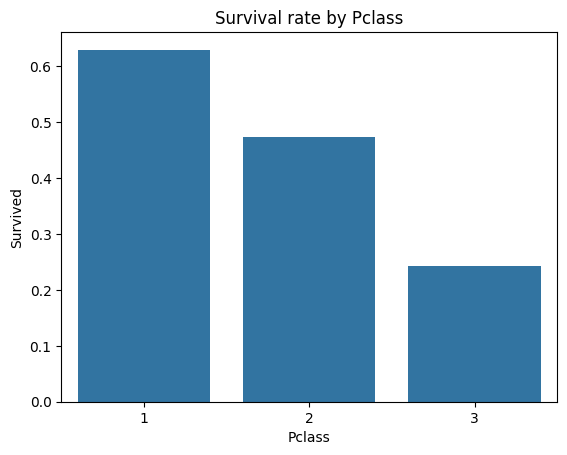

/tmp/ipython-input-3349076345.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df_clean, ci=None)


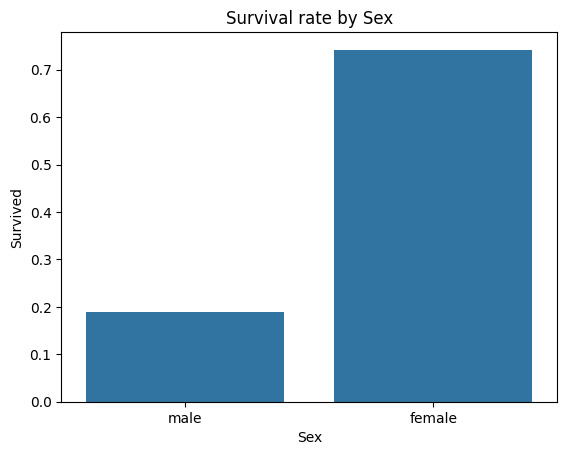

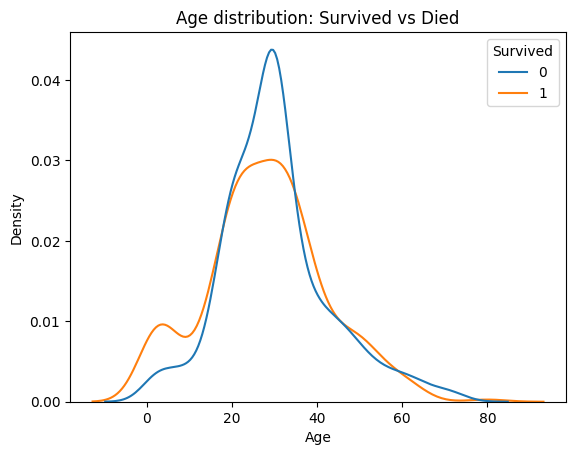

/tmp/ipython-input-3349076345.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df_clean, ci=None)


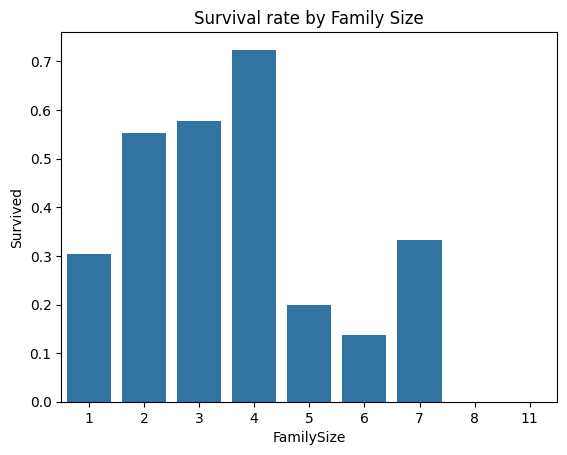

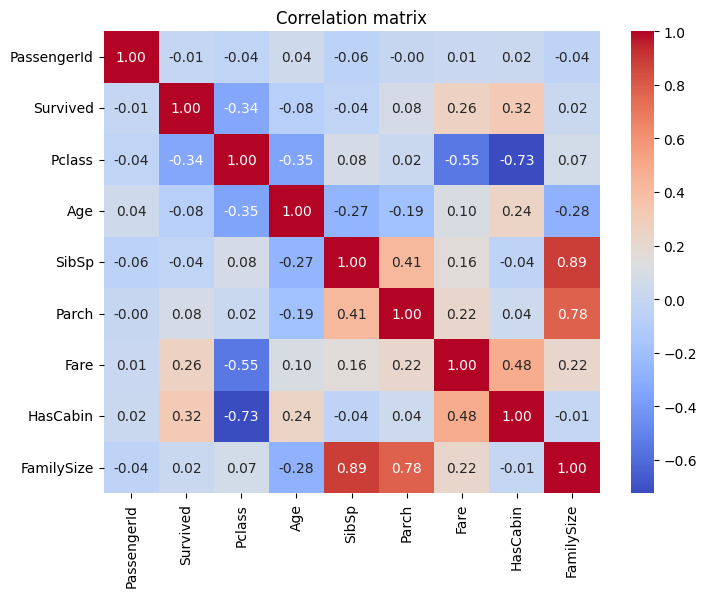

/tmp/ipython-input-3349076345.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Title', y='Survived', data=df_clean, order=order, ci=None)


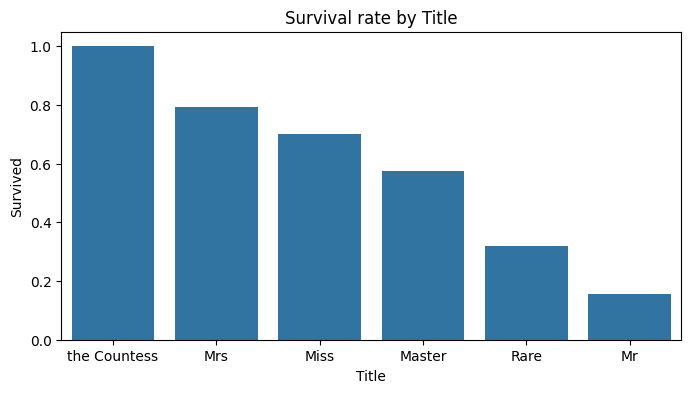

In [11]:
plt.figure()
sns.barplot(x='Pclass', y='Survived', data=df_clean, ci=None)
plt.title('Survival rate by Pclass')
plt.show()

plt.figure()
sns.barplot(x='Sex', y='Survived', data=df_clean, ci=None)
plt.title('Survival rate by Sex')
plt.show()

plt.figure()
sns.kdeplot(data=df_clean, x='Age', hue='Survived', common_norm=False)
plt.title('Age distribution: Survived vs Died')
plt.show()

plt.figure()
sns.barplot(x='FamilySize', y='Survived', data=df_clean, ci=None)
plt.title('Survival rate by Family Size')
plt.show()

plt.figure(figsize=(8,6))
numcols = df_clean.select_dtypes(include=['number']).columns
sns.heatmap(df_clean[numcols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

plt.figure(figsize=(8,4))
order = df_clean.groupby('Title')['Survived'].mean().sort_values(ascending=False).index
sns.barplot(x='Title', y='Survived', data=df_clean, order=order, ci=None)
plt.title('Survival rate by Title')
plt.show()

### Step 5: Research Question – Survival by Class & Sex

Question: *Which group (based on passenger class and gender) had the highest survival rate?*  
We use a pivot table and grouped averages to compare survival rates for each combination of `Pclass` and `Sex`.


In [12]:
pivot = df_clean.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
print("Pivot table:\n", pivot)

combo = df_clean.groupby(['Pclass','Sex'])['Survived'].mean().reset_index().sort_values('Survived', ascending=False)
print("\nSurvival by Pclass & Sex:\n", combo)

print("\nTop group by survival:")
top = combo.iloc[0]
print(f"Pclass={top['Pclass']}, Sex={top['Sex']}, Survival rate={top['Survived']:.2%}")


Pivot table:
 Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447

Survival by Pclass & Sex:
    Pclass     Sex  Survived
0       1  female  0.968085
2       2  female  0.921053
4       3  female  0.500000
1       1    male  0.368852
3       2    male  0.157407
5       3    male  0.135447

Top group by survival:
Pclass=1, Sex=female, Survival rate=96.81%


### Step 6: Additional Question – Survival by Embarkation Port

Question: *Which embarkation port had the highest survival rate (only considering ports with at least 50 passengers)?*  
We group by `Embarked`, calculate the mean survival rate and filter for ports with enough passengers, then visualize with a bar chart.


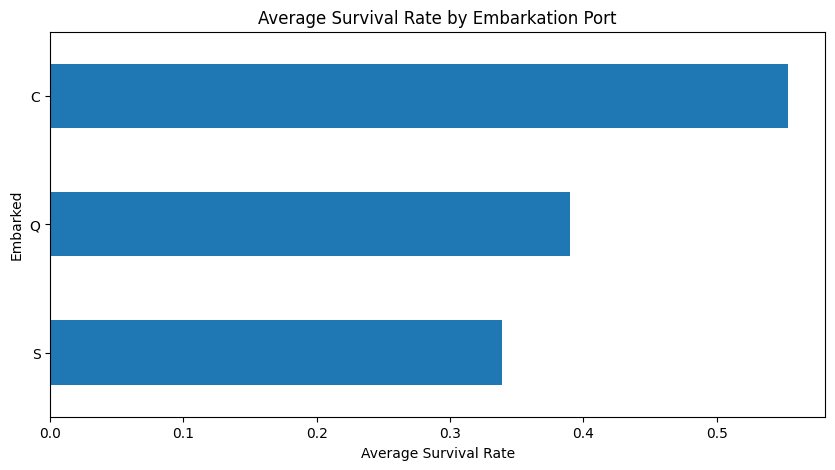

In [16]:
ax = df_clean.groupby('Embarked')['Survived'] \
    .agg(['mean','count']) \
    .query('count >= 50') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(10,5), title='Average Survival Rate by Embarkation Port')

ax.set_xlabel('Average Survival Rate')
plt.show()
